In [2]:
# Import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import acf

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Maidstone 5-year

In [3]:
wide_data_incidence = pd.read_csv('wide_incidence_full.csv',header=[0,1], index_col=0)
wide_data_total = pd.read_csv('wide_total_full.csv',header=[0,1], index_col=0)
npis = pd.read_csv('ltla_to_nhs.csv')
weekly_counts_total = pd.read_csv('weekly_total_full.csv')
test = wide_data_incidence.reset_index()
test.date = pd.to_datetime(test.date)
test = test[test.date >= pd.to_datetime('2020-06-01')]
wide_data_incidence = test
test = wide_data_total.reset_index()
test.date = pd.to_datetime(test.date)
test = test[test.date >= pd.to_datetime('2020-06-01')]
wide_data_total = test

In [4]:
rolling = wide_data_incidence['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(19*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(19*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

rolling = wide_data_total['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total_det[i] = eigenvalues[dominant_index]
        cov_100_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec_det[i] = np.array(19*[0])
        cov_100_total_det[i] = np.nan
        cov_100_var_det[i] = np.nan


rolling = wide_data_total['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total_det[i] = eigenvalues[dominant_index]
        cov_30_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec_det[i] = np.array(19*[0])
        cov_30_total_det[i] = np.nan
        cov_30_var_det[i] = np.nan

/tmp/ipykernel_412076/514419635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


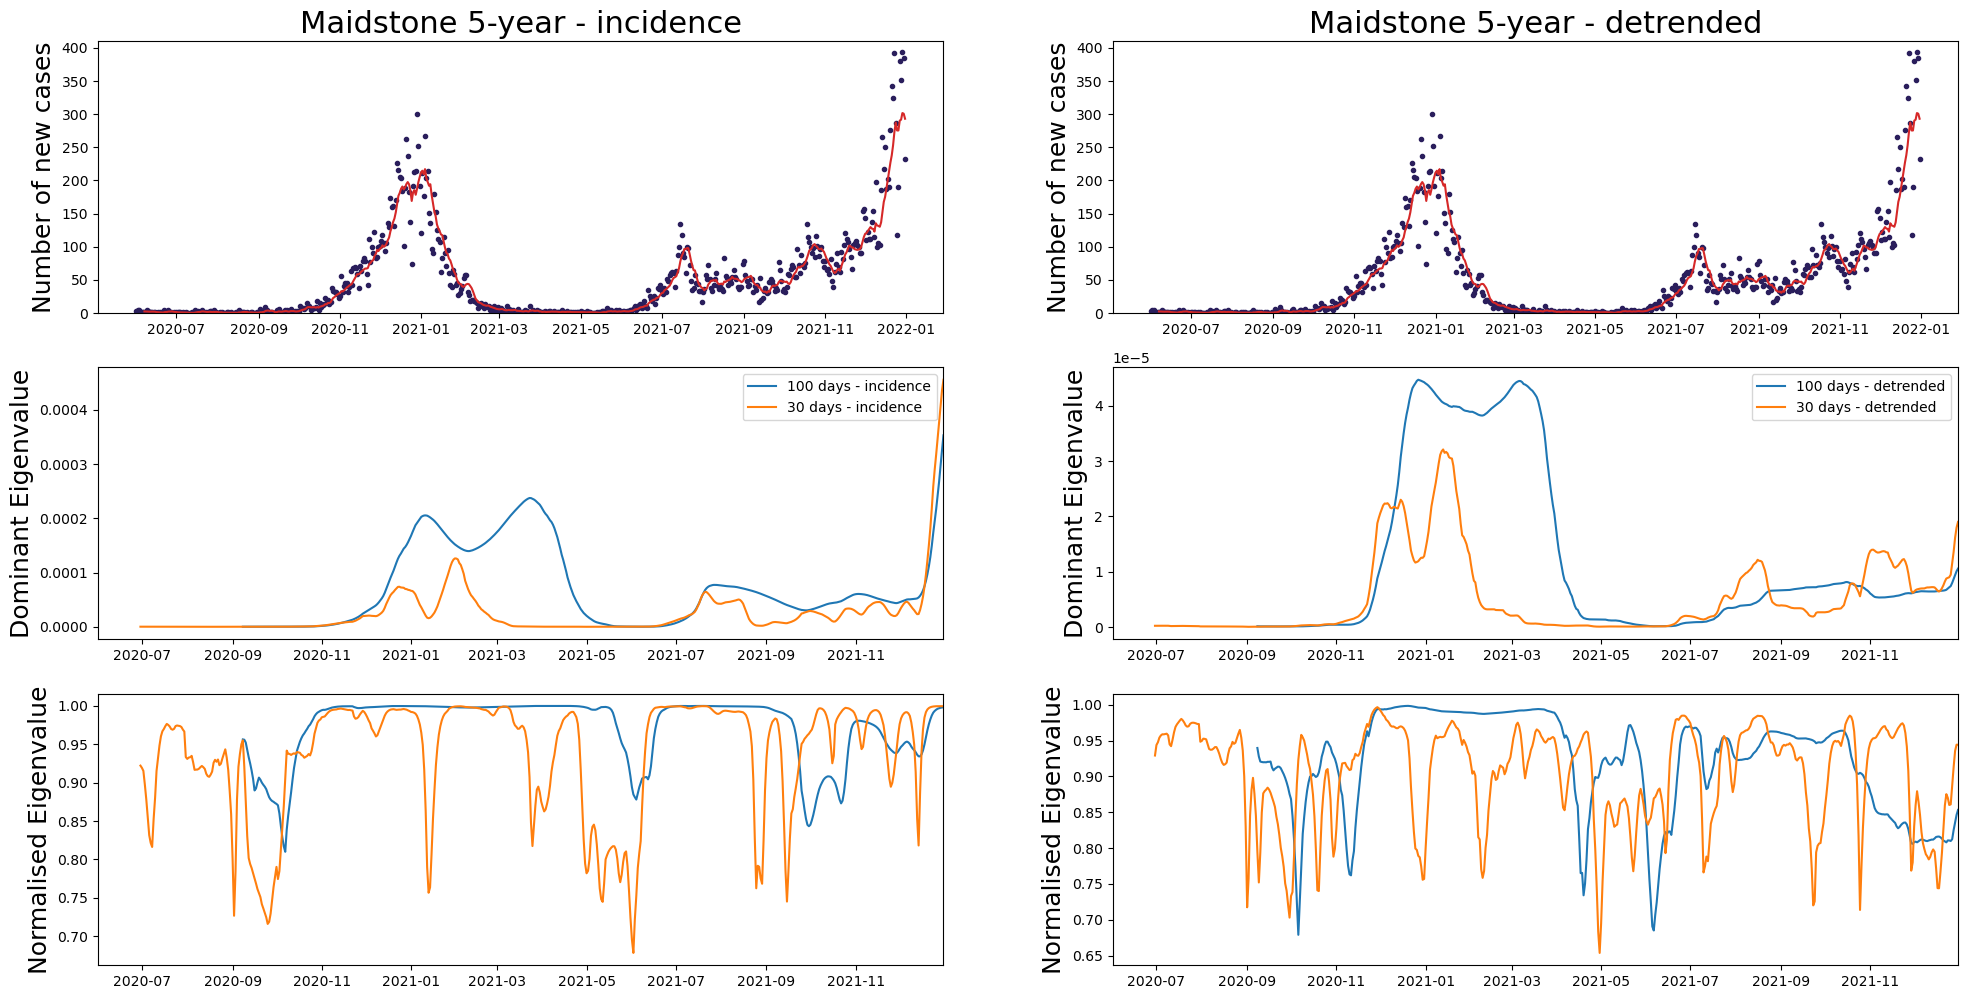

In [5]:
cases_plot = pd.read_csv('cases_total.csv')
cases_plot['date'] = pd.to_datetime(cases_plot['date'])
cases_plot.set_index('date',inplace=True)

counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone 5-year - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[1,0].plot(counts['date'],cov_100_total,label='100 days - incidence')
axs[2,0].plot(counts['date'],cov_100_var,label='100 days - incidence')
axs[1,0].plot(counts['date'],cov_30_total,label='30 days - incidence')
axs[2,0].plot(counts['date'],cov_30_var,label='30 days - incidence')
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,0].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,0].legend()

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone 5-year - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
axs[1,1].plot(counts['date'],cov_100_total_det,label='100 days - detrended')
axs[2,1].plot(counts['date'],cov_100_var_det,label='100 days - detrended')
axs[1,1].plot(counts['date'],cov_30_total_det,label='30 days - detrended')
axs[2,1].plot(counts['date'],cov_30_var_det,label='30 days - detrended')
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,1].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,1].legend()
plt.show()

/tmp/ipykernel_412076/2239272605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


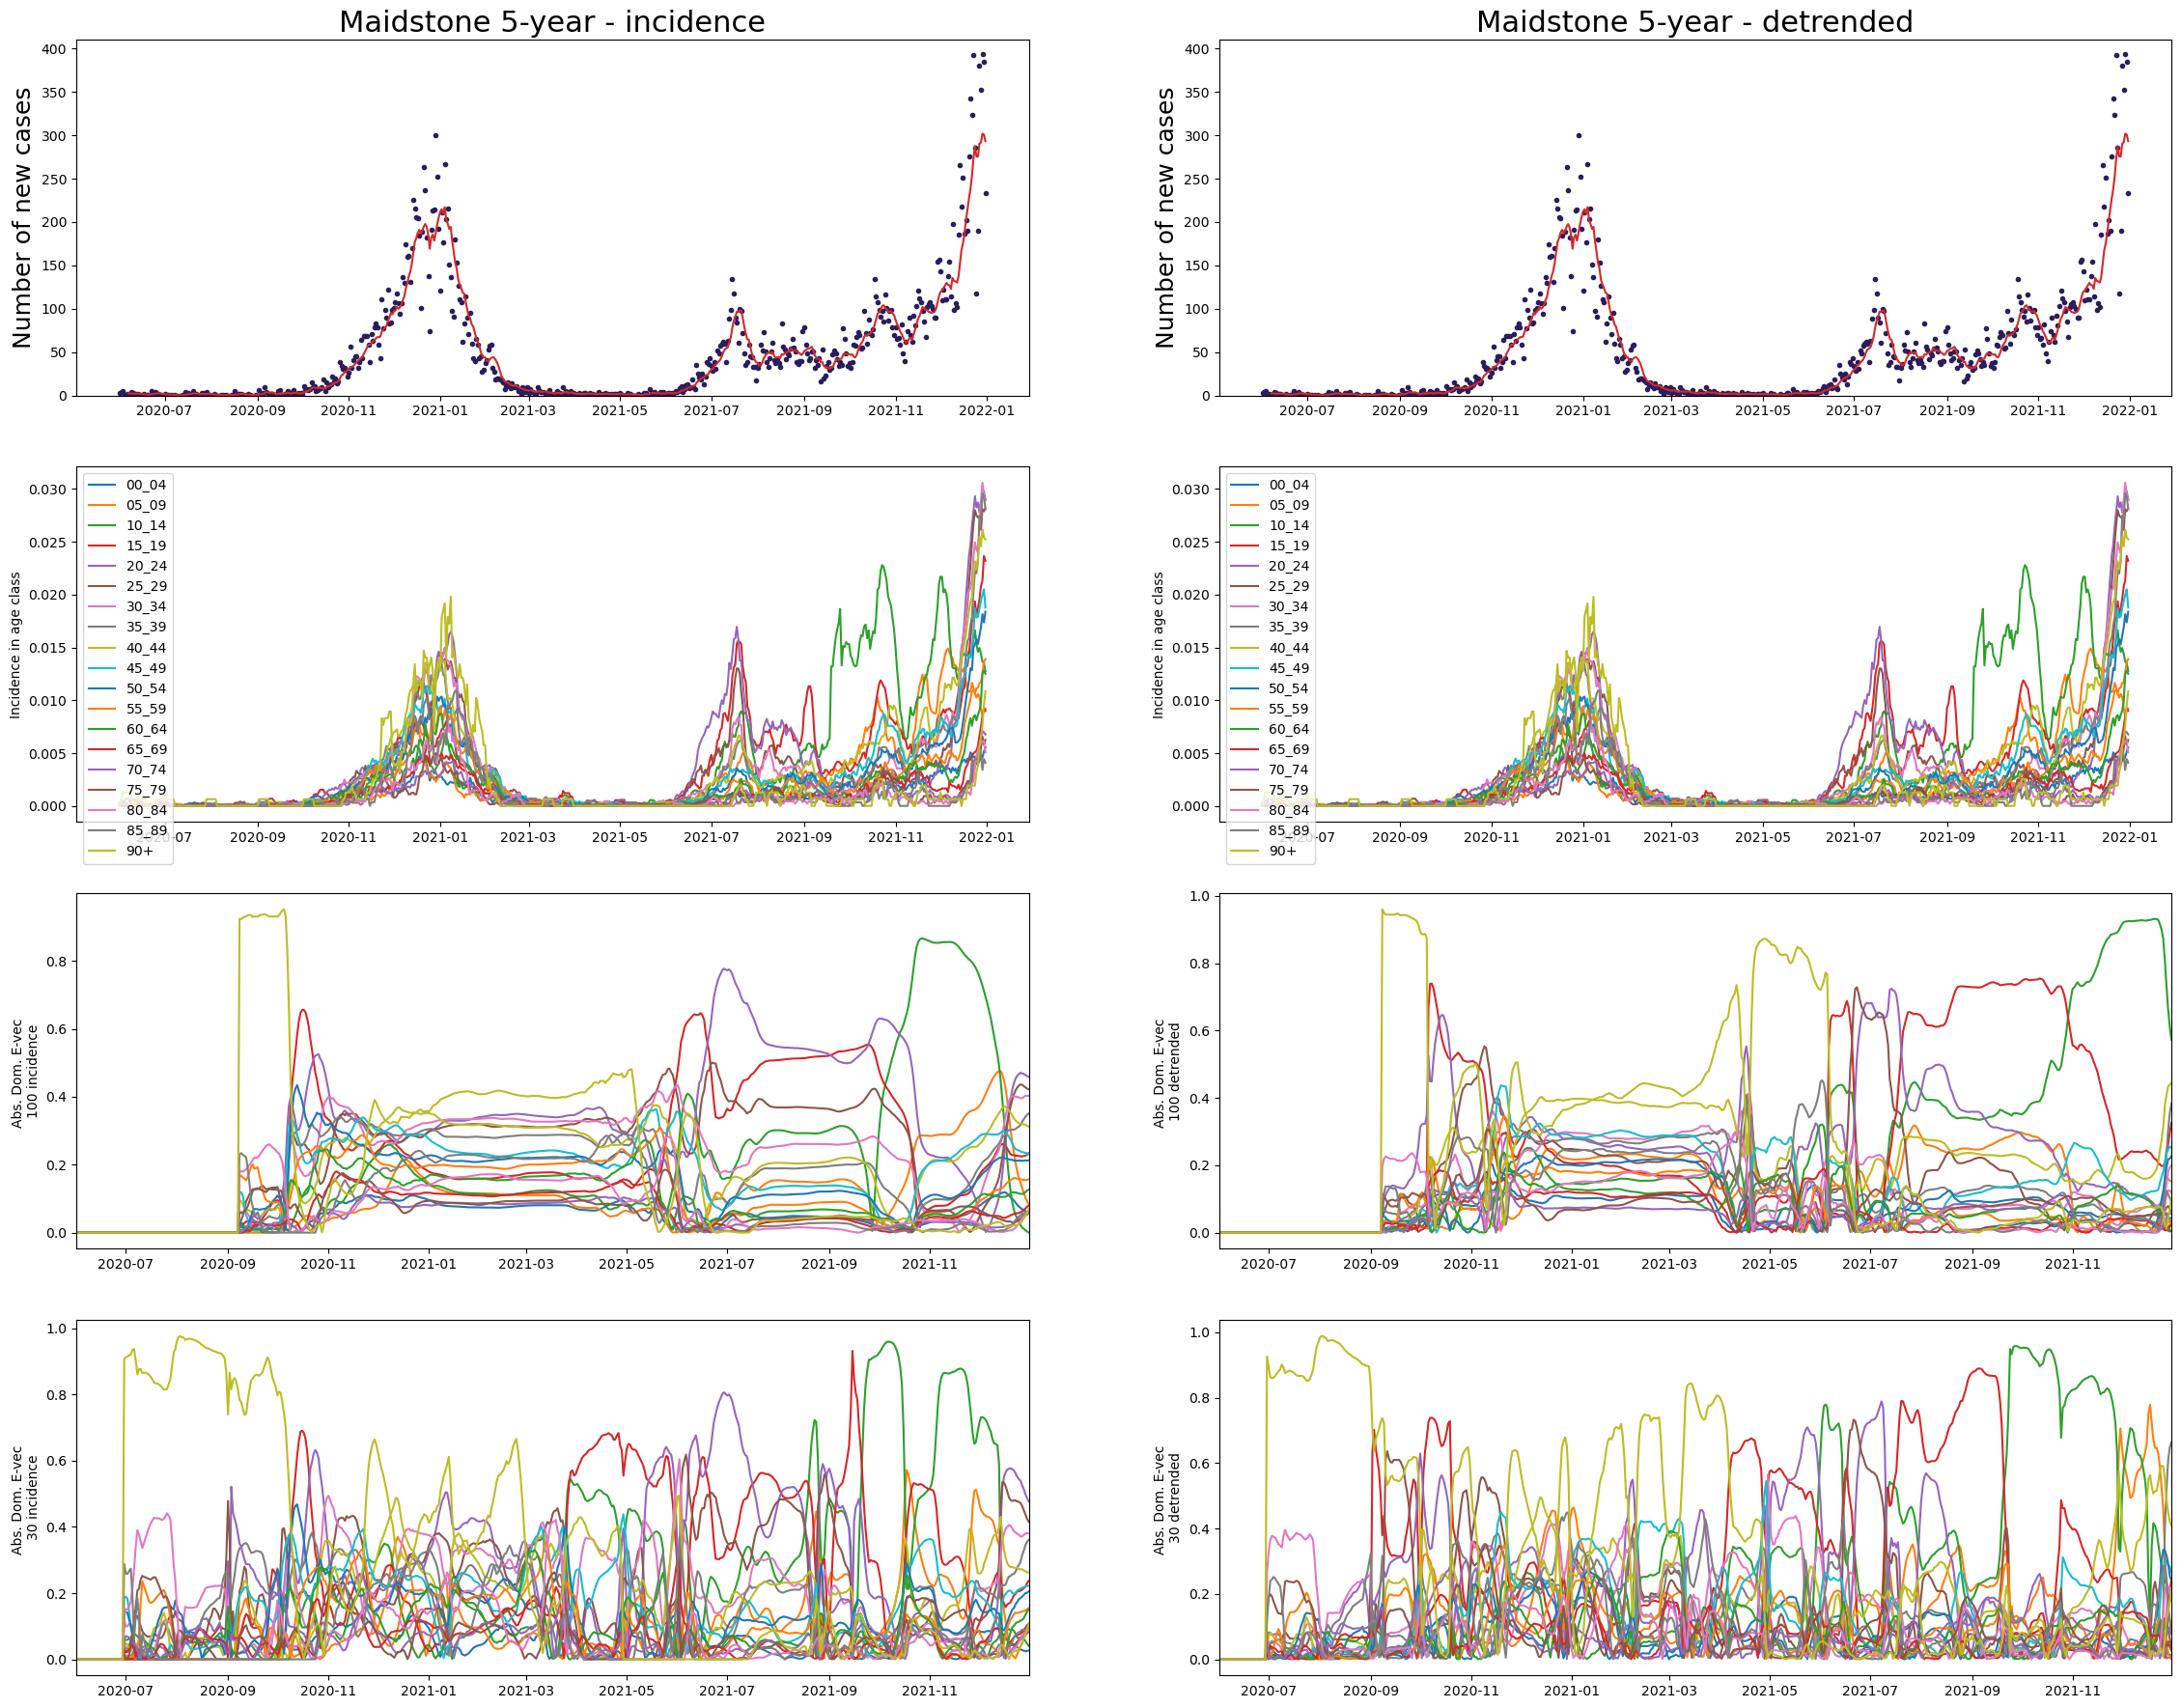

In [6]:
labs = ['00_04', '05_09', '10_14', '15_19', '20_24', '25_29', '30_34', '35_39','40_44', '45_49', '50_54', '55_59', '60_64', '65_69', '70_74', '75_79','80_84', '85_89', '90+']
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(28,22))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone 5-year - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(labs)):
    t = wide_data_incidence.Maidstone[labs[i]]
    axs[1,0].plot(counts['date'],t,label=labs[i])
axs[1,0].set_ylabel('Incidence in age class')
for i in range(len(cov_100_evec[0])):
    axs[2,0].plot(counts['date'],np.abs(cov_100_evec[:,i]))
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[3,0].plot(counts['date'],np.abs(cov_30_evec[:,i]))
axs[3,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[3,0].set_ylabel('Abs. Dom. E-vec \n30 incidence')
axs[1,0].legend(loc='upper left')

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone 5-year - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(labs)):
    t = wide_data_incidence.Maidstone[labs[i]]
    axs[1,1].plot(counts['date'],t,label=labs[i])
axs[1,1].set_ylabel('Incidence in age class')
for i in range(len(cov_100_evec_det[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_100_evec_det[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n100 detrended')
for i in range(len(cov_30_evec_det[0])):
    axs[3,1].plot(counts['date'],np.abs(cov_30_evec_det[:,i]))
axs[3,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[3,1].set_ylabel('Abs. Dom. E-vec \n30 detrended')
axs[1,1].legend(loc='upper left')
plt.show()

## Maidstone 10-year

In [183]:
wide_data_incidence = pd.read_csv('wide_incidence_10year_full.csv',header=[0,1], index_col=0)
wide_data_total = pd.read_csv('wide_total_10year_full.csv',header=[0,1], index_col=0)
npis = pd.read_csv('ltla_to_nhs.csv')
weekly_counts_total = pd.read_csv('weekly_total_10year_full.csv')
test = wide_data_incidence.reset_index()
test.date = pd.to_datetime(test.date)
test = test[test.date >= pd.to_datetime('2020-06-01')]
wide_data_incidence = test
test = wide_data_total.reset_index()
test.date = pd.to_datetime(test.date)
test = test[test.date >= pd.to_datetime('2020-06-01')]
wide_data_total = test

In [184]:
rolling = wide_data_incidence['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(10*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(10*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

rolling = wide_data_total['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total_det[i] = eigenvalues[dominant_index]
        cov_100_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec_det[i] = np.array(10*[0])
        cov_100_total_det[i] = np.nan
        cov_100_var_det[i] = np.nan


rolling = wide_data_total['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total_det[i] = eigenvalues[dominant_index]
        cov_30_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec_det[i] = np.array(10*[0])
        cov_30_total_det[i] = np.nan
        cov_30_var_det[i] = np.nan

/tmp/ipykernel_359744/3115941220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


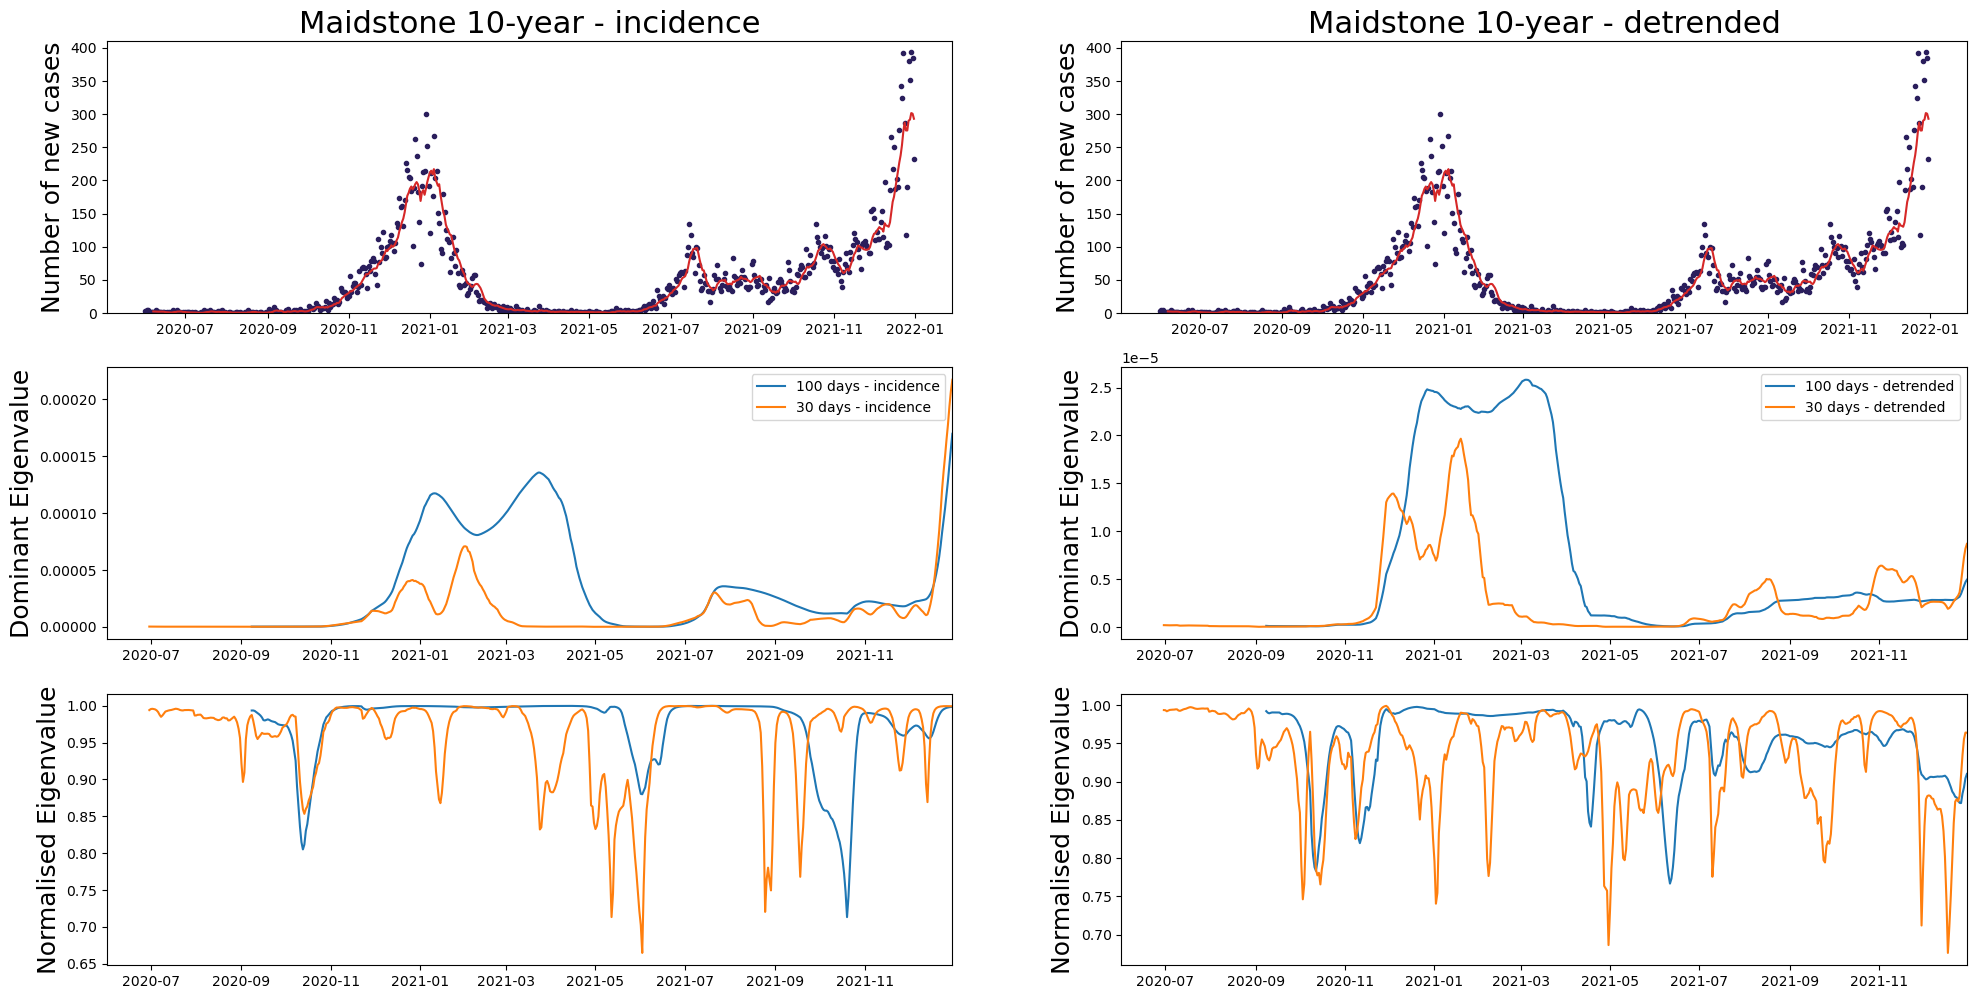

In [211]:
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone 10-year - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[1,0].plot(counts['date'],cov_100_total,label='100 days - incidence')
axs[2,0].plot(counts['date'],cov_100_var,label='100 days - incidence')
axs[1,0].plot(counts['date'],cov_30_total,label='30 days - incidence')
axs[2,0].plot(counts['date'],cov_30_var,label='30 days - incidence')
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,0].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,0].legend()

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone 10-year - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
axs[1,1].plot(counts['date'],cov_100_total_det,label='100 days - detrended')
axs[2,1].plot(counts['date'],cov_100_var_det,label='100 days - detrended')
axs[1,1].plot(counts['date'],cov_30_total_det,label='30 days - detrended')
axs[2,1].plot(counts['date'],cov_30_var_det,label='30 days - detrended')
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,1].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,1].legend()
plt.show()

/tmp/ipykernel_359744/3815256300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


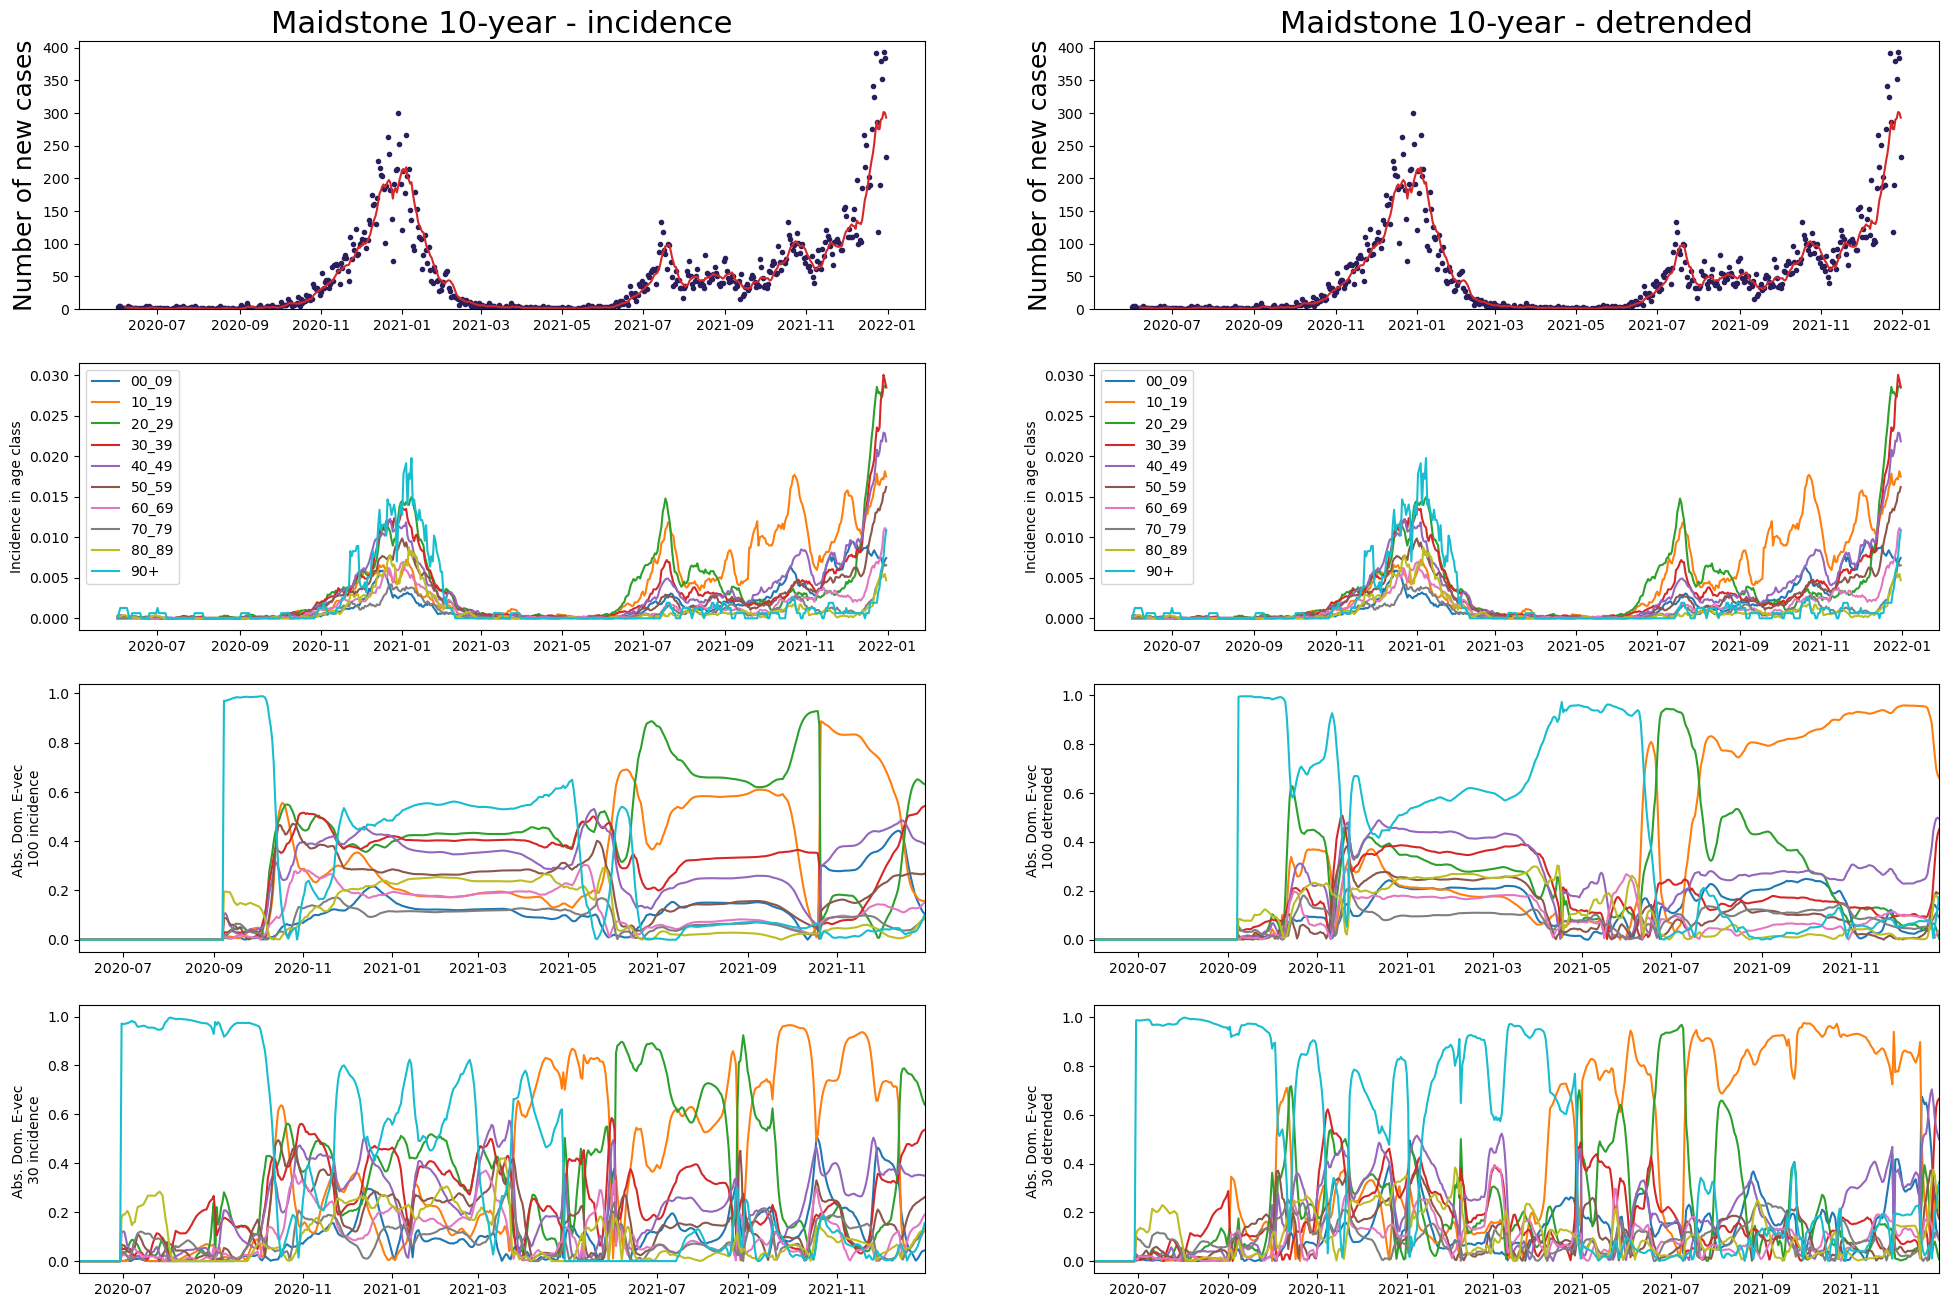

In [209]:
labs = ['00_09', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79','80_89', '90+']
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(24,16))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone 10-year - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(labs)):
    t = wide_data_incidence.Maidstone[labs[i]]
    axs[1,0].plot(counts['date'],t,label=labs[i])
axs[1,0].set_ylabel('Incidence in age class')
for i in range(len(cov_100_evec[0])):
    axs[2,0].plot(counts['date'],np.abs(cov_100_evec[:,i]))
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[3,0].plot(counts['date'],np.abs(cov_30_evec[:,i]))
axs[3,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[3,0].set_ylabel('Abs. Dom. E-vec \n30 incidence')
axs[1,0].legend()

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone 10-year - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(labs)):
    t = wide_data_incidence.Maidstone[labs[i]]
    axs[1,1].plot(counts['date'],t,label=labs[i])
axs[1,1].set_ylabel('Incidence in age class')
for i in range(len(cov_100_evec_det[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_100_evec_det[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n100 detrended')
for i in range(len(cov_30_evec_det[0])):
    axs[3,1].plot(counts['date'],np.abs(cov_30_evec_det[:,i]))
axs[3,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[3,1].set_ylabel('Abs. Dom. E-vec \n30 detrended')
axs[1,1].legend()
plt.show()

## NHS regional

In [158]:
wide_data_incidence_nhs = pd.read_csv('wide_incidence_region.csv',index_col=0)
wide_data_total_nhs = pd.read_csv('wide_total_region.csv',index_col=0)
weekly_counts_total_nhs = pd.read_csv('weekly_total_region.csv')

In [152]:
cases_nhs_full = pd.read_csv('cases_total.csv')
cases_nhs_full['date'] = pd.to_datetime(cases_nhs_full['date'])
cases_nhs_full.set_index('date',inplace=True)
npis = pd.read_csv('ltla_to_nhs.csv')
manual_dat = pd.DataFrame({'ltla20nm': ['Wycombe','South Bucks','Chiltern','Aylesbury Vale','Cornwall and Isles of Scilly', 'Hackney and City of London'], \
                           'region': ['South East', 'South East', 'South East', 'South East', 'South West', 'London']})
npis = pd.concat([npis,manual_dat])
pop_nhs = pd.read_csv('census_estimate.csv')
ltla_pop = pd.read_csv('newCasesPCROnlyBySpecimenDate_ltla_2020.csv')
ltla_pop = ltla_pop[['area_code','area_name']]
ltla_pop.drop_duplicates(inplace=True)
ltla_pop = pd.merge(ltla_pop, npis, left_on='area_name', right_on='ltla20nm').drop(columns='ltla20nm')
ltla_pop = pd.merge(ltla_pop, pop_nhs)
nhs_pop = ltla_pop.groupby('region').sum().drop(columns=['area_code','area_name','Unnamed: 0'])
nhs_pop.reset_index(inplace=True)

cases_nhs = pd.merge(cases_nhs_full.reset_index(), npis, left_on='area_name', right_on='ltla20nm')
cases_nhs.drop(columns=['ltla20nm','area_name','area_code','Unnamed: 0'],inplace=True)
cases_nhs = cases_nhs.groupby(['date','region']).sum().reset_index().set_index('date')

cases_total = cases_nhs.reset_index().drop(columns='region').groupby('date').sum()
cases_total['rolling'] = cases_total.rolling(7).mean()

cases_nhs['rolling'] = np.NaN
cases_nhs = cases_nhs.reset_index()
for r in np.unique(cases_nhs.region.values):
    t = cases_nhs.reset_index()
    t = t[t.region == r].set_index('date')['value'].rolling(7).mean()
    cases_nhs.loc[cases_nhs['region'] == r,'rolling'] = t.values

In [151]:
cases_nhs = (pd.read_csv('newCasesPCROnlyBySpecimenDate_region_2021.csv')).drop(columns=['area_type','metric_name','metric','area_code','area_name'])
cases_nhs['date'] = pd.to_datetime(cases_nhs['date'])
cases_nhs.set_index('date',inplace=True)
cases_nhs = cases_nhs.groupby('date').sum()
cases_nhs['rolling'] = cases_nhs.rolling(7).mean()

In [162]:
rolling = wide_data_incidence_nhs.rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),7))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(7*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence_nhs.rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),7))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(7*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

rolling = wide_data_total_nhs.rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),7))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total_det[i] = eigenvalues[dominant_index]
        cov_100_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec_det[i] = np.array(7*[0])
        cov_100_total_det[i] = np.nan
        cov_100_var_det[i] = np.nan


rolling = wide_data_total_nhs.rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),7))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total_det[i] = eigenvalues[dominant_index]
        cov_30_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec_det[i] = np.array(7*[0])
        cov_30_total_det[i] = np.nan
        cov_30_var_det[i] = np.nan

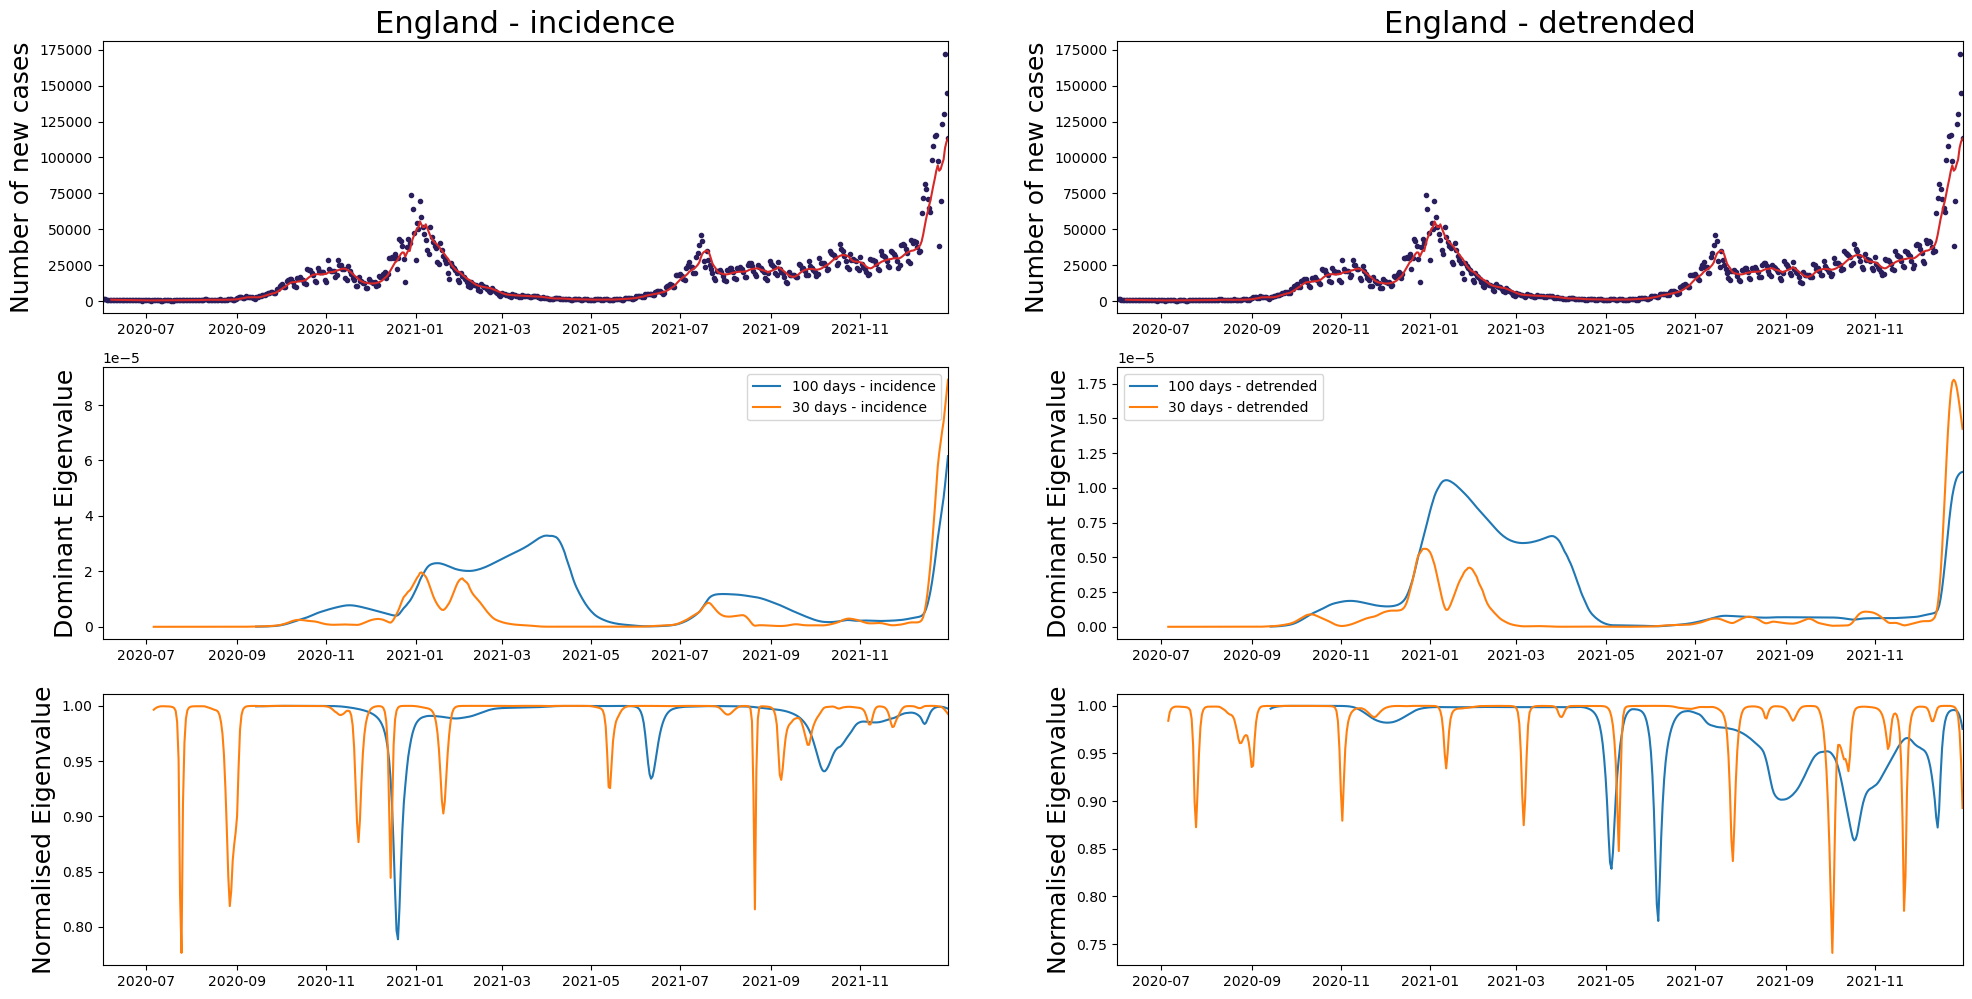

In [182]:
from copy import deepcopy
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts_nhs = deepcopy(cases_total)
counts_nhs = counts_nhs.reset_index()
axs[0,0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,0].set_title('England - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[0,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1,0].plot(counts_nhs['date'],cov_100_total,label='100 days - incidence')
axs[2,0].plot(counts_nhs['date'],cov_100_var,label='100 days - incidence')
axs[1,0].plot(counts_nhs['date'],cov_30_total,label='30 days - incidence')
axs[2,0].plot(counts_nhs['date'],cov_30_var,label='30 days - incidence')
axs[1,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,0].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,0].legend()
axs[0,1].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,1].set_title('England - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
axs[0,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1,1].plot(counts_nhs['date'],cov_100_total_det,label='100 days - detrended')
axs[2,1].plot(counts_nhs['date'],cov_100_var_det,label='100 days - detrended')
axs[1,1].plot(counts_nhs['date'],cov_30_total_det,label='30 days - detrended')
axs[2,1].plot(counts_nhs['date'],cov_30_var_det,label='30 days - detrended')
axs[1,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2,1].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1,1].legend()
plt.show()

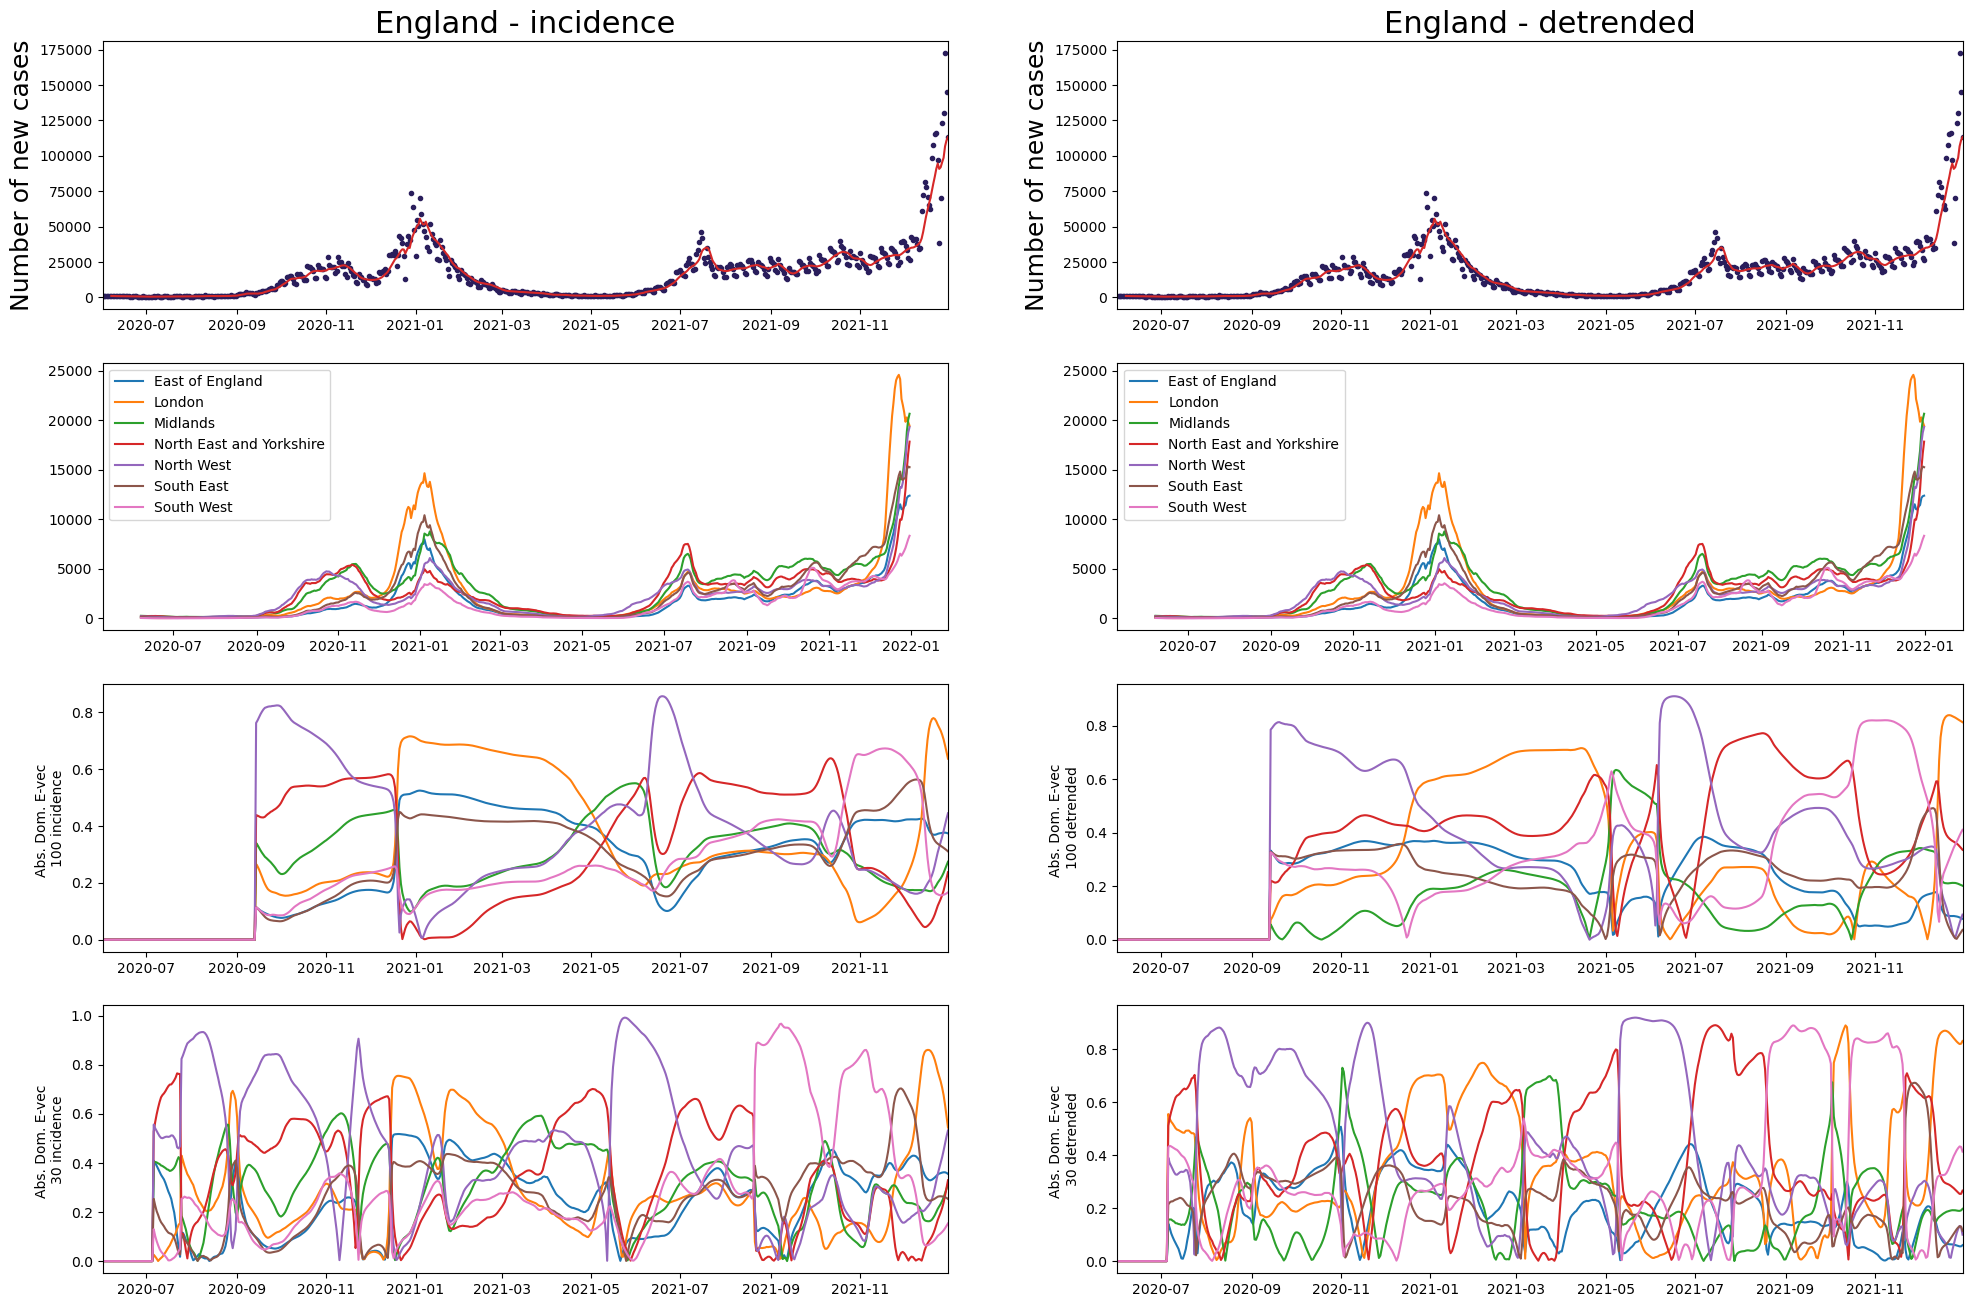

In [178]:
labs = ['East of England','London',"Midlands","North East and Yorkshire","North West","South East","South West"]
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(24,16))
counts_nhs = deepcopy(cases_total)
counts_nhs = counts_nhs.reset_index()
axs[0,0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,0].set_title('England - incidence',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[0,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
for i in range(len(labs)):
    t = cases_nhs.loc[cases_nhs['region'] == labs[i], 'rolling']
    axs[1,0].plot(counts_nhs['date'], t,label=labs[i])
for i in range(len(cov_100_evec[0])):
    axs[2,0].plot(counts_nhs['date'],np.abs(cov_100_evec[:,i]),label=labs[i])
axs[2,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[3,0].plot(counts_nhs['date'],np.abs(cov_30_evec[:,i]))
axs[3,0].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[3,0].set_ylabel('Abs. Dom. E-vec \n30 incidence')
axs[1,0].legend()

axs[0,1].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,1].set_title('England - detrended',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
axs[0,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
for i in range(len(labs)):
    t = cases_nhs.loc[cases_nhs['region'] == labs[i], 'rolling']
    axs[1,1].plot(counts_nhs['date'], t,label=labs[i])
for i in range(len(cov_100_evec_det[0])):
    axs[2,1].plot(counts_nhs['date'],np.abs(cov_100_evec_det[:,i]),label=labs[i])
axs[2,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n100 detrended')
for i in range(len(cov_30_evec_det[0])):
    axs[3,1].plot(counts_nhs['date'],np.abs(cov_30_evec_det[:,i]))
axs[3,1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[3,1].set_ylabel('Abs. Dom. E-vec \n30 detrended')
axs[1,1].legend()
plt.show()